In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn import model_selection
from sklearn import metrics

C:\Users\Surya\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data=pd.read_csv("Train_data.csv")

In [4]:
data.drop(['area code','state','phone number'],axis=1,inplace=True)

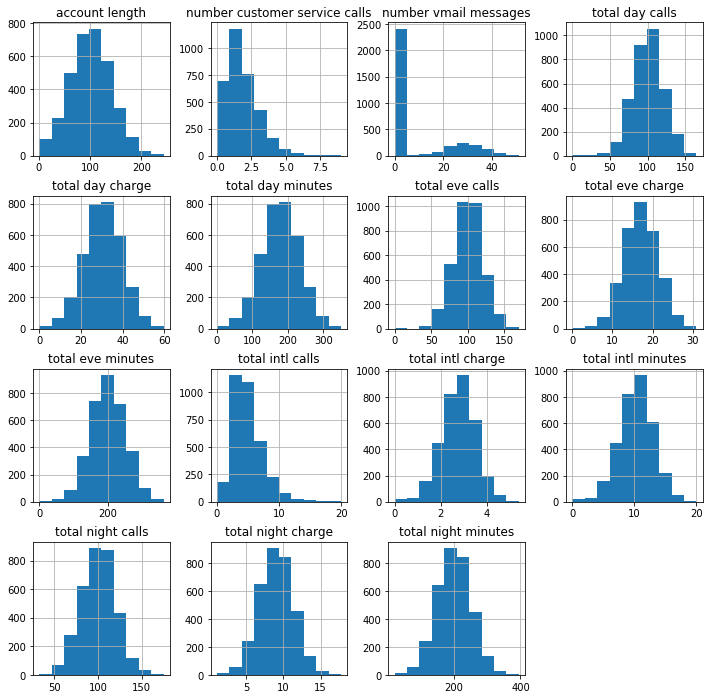

In [5]:
data.hist(figsize=(12,12))
plt.show()

In [6]:
data['Churn']=data.Churn.map({' True.':1,' False.':0})

In [7]:
data.columns

Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'number customer service calls', 'Churn'],
      dtype='object')

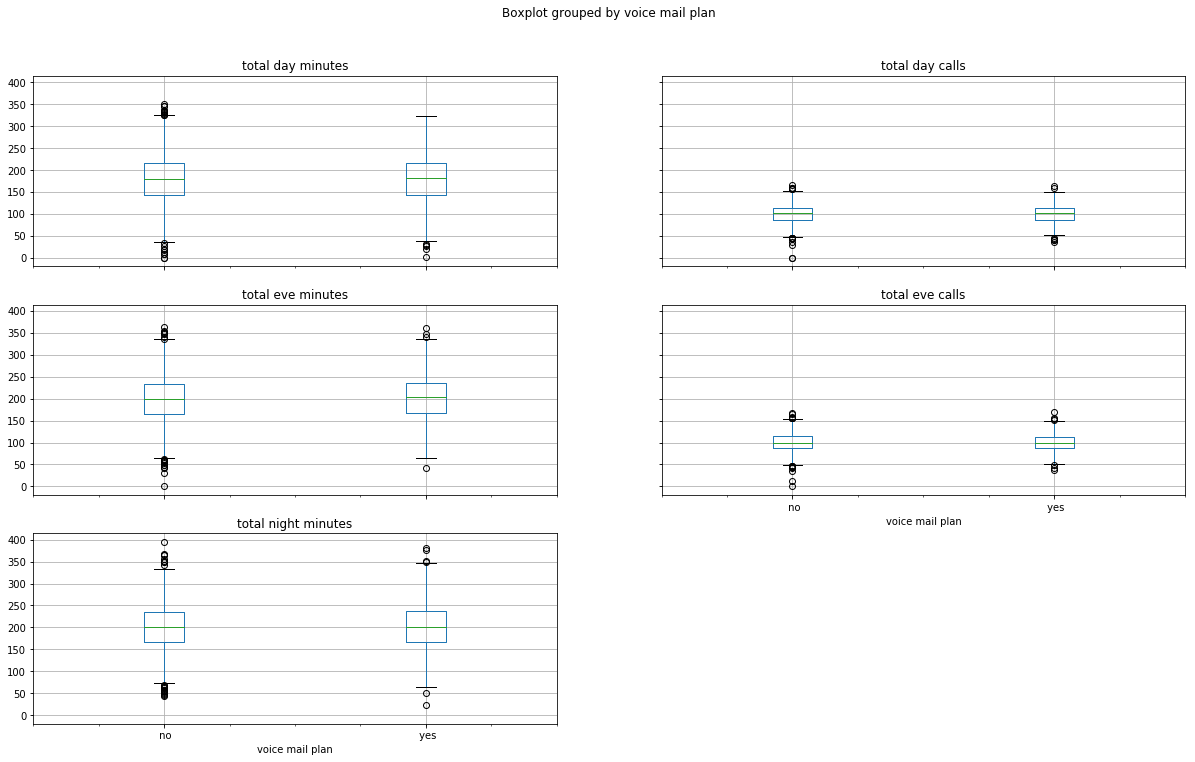

In [8]:
data.boxplot(column=['total day minutes', 'total day calls',
        'total eve minutes', 'total eve calls',
        'total night minutes'],by='voice mail plan',figsize=(20,12))
plt.show()

In [9]:
col=['total day minutes', 'total day calls',
        'total eve minutes', 'total eve calls',
        'total night minutes']
for i in col:
    q75,q25=np.percentile(data.loc[:,i],[75,25])
    iqr=q75-q25
    max=q75+1.5*iqr
    min=q25-1.5*iqr
    data=data.drop(data[data.loc[:,i]>max].index)
    data=data.drop(data[data.loc[:,i]<min].index)

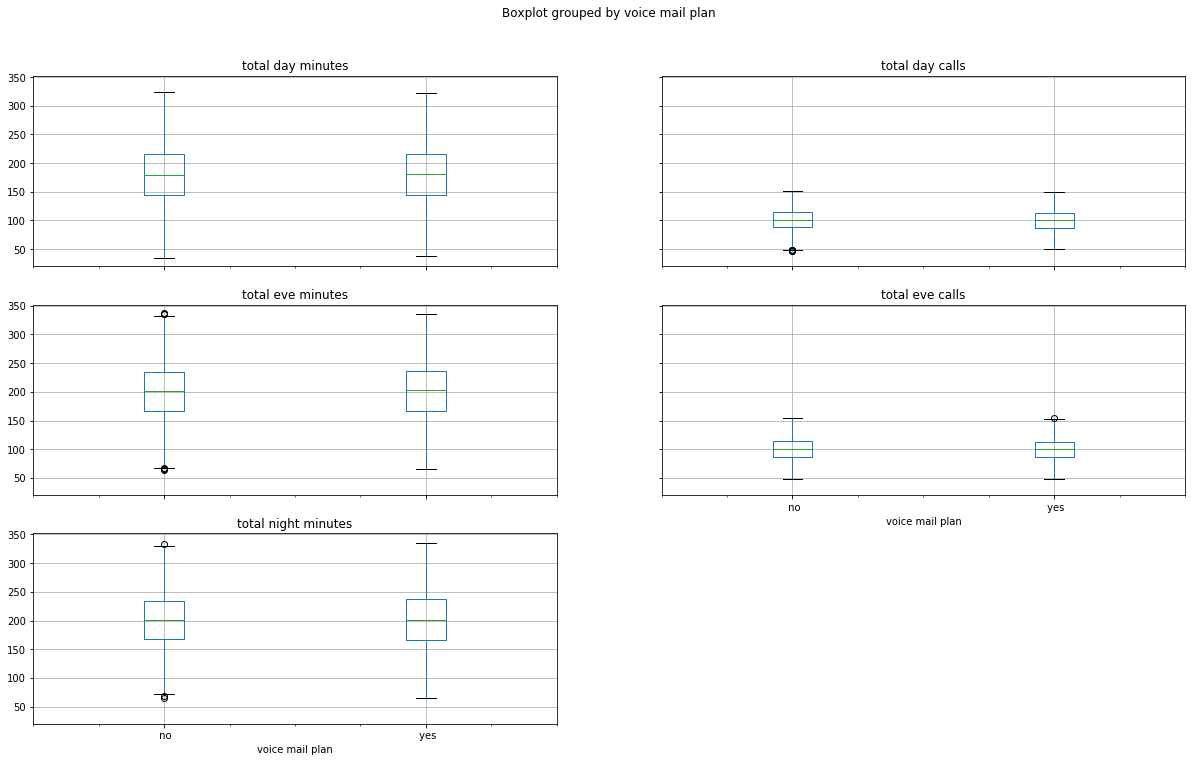

In [10]:
data.boxplot(column=['total day minutes', 'total day calls',
        'total eve minutes', 'total eve calls',
        'total night minutes'],by='voice mail plan',figsize=(20,12))
plt.show()

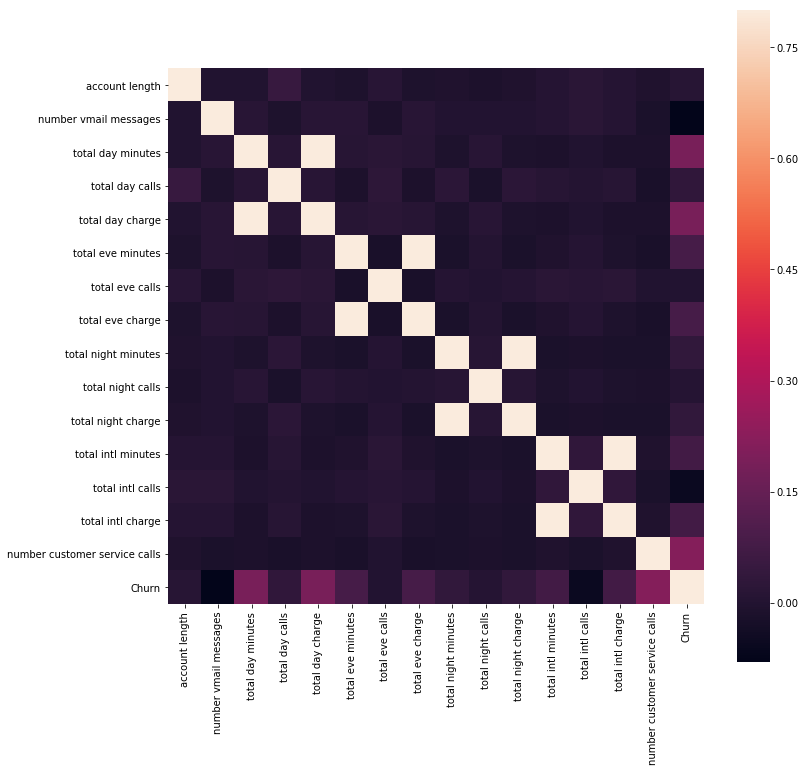

In [11]:
cor_relation=data.corr()
fig=plt.figure(figsize=(12,12))
sns.heatmap(cor_relation,vmax=.8,square=True)
plt.show()

In [12]:
X=np.array(data.drop(['Churn','international plan', 'voice mail plan'],1))
y=data['Churn']
y=y.astype('int')
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [13]:
col=['total day charge','total eve charge','total night charge',
     'total intl charge','international plan', 'voice mail plan']

col1=[c for c in data.columns if c not in col]
data1=data[col1]

In [14]:
X=np.array(data1.drop(['Churn'],1))
y=data1['Churn']
y=y.astype('int')
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [15]:
models1=[]
models1.append(('LogisticRegression: ',LogisticRegression()))
models1.append(('DecisionTree: ',DecisionTreeClassifier()))
models1.append(('RandomForest: ',RandomForestClassifier(n_estimators=100)))

In [16]:
names1=[]
results1=[]
for name1,model1 in models1:
    KFold1=model_selection.KFold(n_splits=10,random_state=8)
    cv_result1=model_selection.cross_val_score(model1,X_train,y_train,cv=KFold1,scoring='accuracy')
    results1.append(cv_result1)
    msg1='{} {}'.format(name1,cv_result1.mean())
    print(msg1)

LogisticRegression:  0.8595783187041895
DecisionTree:  0.8622945133170452
RandomForest:  0.9140319126474227


In [17]:
for name1,model1 in models1:
    model1.fit(X_train,y_train)
    pred=model1.predict(X_test)
    print("*"*60)
    print('{} {}'.format(name1,metrics.accuracy_score(y_test,pred)))
    print('{}\n{}'.format("Confusion Matrix :",metrics.confusion_matrix(y_test,pred)))
    print('{}\n{}'.format("Classification Report :",metrics.classification_report(y_test,pred)))
    print("*"*60)

************************************************************
LogisticRegression:  0.8491446345256609
Confusion Matrix :
[[542  10]
 [ 87   4]]
Classification Report :
             precision    recall  f1-score   support

          0       0.86      0.98      0.92       552
          1       0.29      0.04      0.08        91

avg / total       0.78      0.85      0.80       643

************************************************************
************************************************************
DecisionTree:  0.8724727838258165
Confusion Matrix :
[[506  46]
 [ 36  55]]
Classification Report :
             precision    recall  f1-score   support

          0       0.93      0.92      0.93       552
          1       0.54      0.60      0.57        91

avg / total       0.88      0.87      0.88       643

************************************************************
************************************************************
RandomForest:  0.926905132192846
Confusion Matrix :
[[549  